In [8]:
# Import necessary modules and functions
# test
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
cols = ['project_id', 'blurb', 'category', 'country', 'created_at', 'currency', 'deadline', 'fx_rate', 'goal',
'launched_at', 'name', 'staff_pick', 'location', 'subcategory', 'project_url', 'reward_url']

In [2]:
df = pd.read_csv('KS_train_data.csv', delimiter=',')
#df_test = pd.read_csv('KS_test_data.csv', delimiter=';')

In [3]:
df.columns

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')

In [4]:
print(datetime.fromtimestamp(df.iloc[1].created_at))

2012-03-05 06:41:24


In [5]:
df['delta_time_created'] = df.deadline - df.created_at
df['delta_time_launched'] = df.deadline - df.launched_at

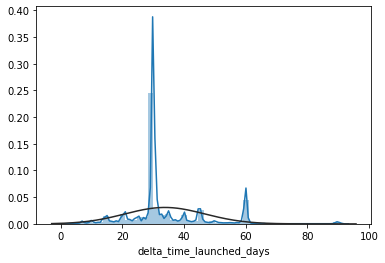

In [6]:
df['delta_time_launched_days'] = df.delta_time_launched / 86400
df['delta_time_created_days'] = df.delta_time_launched / 86400

sns.distplot(df.delta_time_launched_days, fit=norm)


In [7]:
df[cols].info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
project_id     100000 non-null object
blurb          99998 non-null object
category       100000 non-null object
country        99997 non-null object
created_at     100000 non-null int64
currency       100000 non-null object
deadline       100000 non-null int64
fx_rate        100000 non-null float64
goal           100000 non-null float64
launched_at    100000 non-null int64
name           99999 non-null object
staff_pick     100000 non-null bool
location       100000 non-null object
subcategory    100000 non-null object
project_url    100000 non-null object
reward_url     100000 non-null object
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 11.5+ MB


NameError: name 'df_test' is not defined

In [ ]:
total_funded = df.loc[(df.funded==True), 'funded'].value_counts()

In [ ]:
funded_staff_pick = df.loc[(df.funded==True) & (df.staff_pick == True), 'staff_pick'].value_counts() / total_funded
funded_staff_pick
# means that about 80% of those funded were not staff picked


In [ ]:
df['staff_pick'].value_counts().plot(kind='bar')

In [ ]:
df['goal_converted_log'] = np.log(df.goal * df.fx_rate)


In [ ]:
funded = df.loc[df.funded == True]
not_funded = df.loc[df.funded == False]

dplot = sns.distplot(funded.goal_converted_log, kde=False, color='green', bins=150, hist=True, fit=norm, label='Funded')
dplot = sns.distplot(not_funded.goal_converted_log, kde=False, color='red', bins=150, hist=True, fit=norm, label='Unfunded')
dplot.set(xlim=(3,15))
dplot.legend(prop={'size': 12})
dplot.set_title('Funded vs unfunded converted log goals')

In [ ]:
sns.catplot(data=df, x ='funded', y='goal_converted_log', kind='point')

In [ ]:
df['goal_per_day'] = df['goal_converted_log'] / df['delta_time_launched']

In [ ]:
funded = df.loc[df.funded == True]
not_funded = df.loc[df.funded == False]

dplot = sns.distplot(funded.goal_per_day, kde=False, color='green', bins=300, hist=True, fit=norm, label='Funded')
dplot = sns.distplot(not_funded.goal_per_day, kde=False, color='red', bins=300, hist=True, fit=norm, label='Unfunded')
dplot.set(xlim=(-0.00001,.00001))
dplot.legend(prop={'size': 12})
dplot.set_title('Funded vs unfunded projects by log $/day needed to reach goal')

In [ ]:
sns.catplot(data=df, x ='funded', y='goal_per_day', kind='point')

In [ ]:
sns.catplot(data=df, x ='funded', y='delta_time_launched_days', kind='point')

In [ ]:
# normalize category data
total_in_cat = {}
funded_in_cat = {}
rate_funded_cat = {}
for x in df.category.unique():
    total_in_cat[x] = df.loc[(df.category == x, 'project_id')].count()
    funded_in_cat[x] = df.loc[(df.category == x) & (df.funded == True), 'project_id'].count() 
    rate_funded_cat[x] = funded_in_cat[x] / total_in_cat[x]


In [ ]:
rate_funded_cat

In [ ]:
sorted_rate_funded_cat = sorted(rate_funded_cat.items(), key=lambda x: x[1], reverse=True)
plt.bar([x[0] for x in sorted_rate_funded_cat], [y[1] for y in sorted_rate_funded_cat])
#plt.bar(rate_funded_cat.keys(), rate_funded_cat.values())

In [ ]:
df['rate_funded_cat'] = df.apply(lambda row: rate_funded_cat[row.category], axis=1)

In [ ]:
df.loc[df.category == 'art', 'subcategory'].unique()

In [ ]:
total_in_subcat = {}
funded_in_subcat = {}
rate_funded_subcat = {}
for x in df.subcategory.unique():
    total_in_subcat[x] = df.loc[(df.subcategory == x, 'project_id')].count()
    funded_in_subcat[x] = df.loc[(df.subcategory == x) & (df.funded == True), 'project_id'].count() 
    rate_funded_subcat[x] = funded_in_subcat[x] / total_in_subcat[x]

In [ ]:
plt.bar(rate_funded_subcat.keys(), rate_funded_subcat.values())

In [ ]:
total_in_subcat
#sorted_rate_funded_country

In [ ]:
# needs to be fixed - think it's the null values in country that need to be dropped first
#total_in_country = {}
#funded_in_country = {}
#rate_funded_country = {}
#for x in df.country.unique():
#     total_in_country[x] = df.loc[(df.country == x, 'project_id')].count()
#     funded_in_country[x] = df.loc[(df.country == x) & (df.funded == True), 'project_id'].count() 
#     rate_funded_country[x] = funded_in_country[x] / total_in_country[x]
# sorted_rate_funded_country = sorted(rate_funded_country.items(), key=lambda x: x[1], reverse=True)
# plt.bar([x[0] for x in sorted_rate_funded_country], [y[1] for y in sorted_rate_funded_country])

In [ ]:
dum_df = pd.get_dummies(df, columns=["category"], prefix=["cat_typ"] )


In [ ]:
cols = ['cat_typ_art', 'cat_typ_comics', 'cat_typ_crafts',
       'cat_typ_dance', 'cat_typ_design', 'cat_typ_fashion',
       'cat_typ_film & video', 'cat_typ_food', 'cat_typ_games',
       'cat_typ_journalism', 'cat_typ_music', 'cat_typ_photography',
       'cat_typ_publishing', 'cat_typ_technology', 'cat_typ_theater', 'rate_funded_cat', 'delta_time_launched_days', 'goal_converted_log', 'staff_pick']
x_train, x_test, y_train, y_test = train_test_split(dum_df[cols], dum_df['funded'], test_size =0.80, random_state=0)
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.C = 0.01
lgr.fit(x_train, y_train)
score = lgr.score(x_test, y_test)
predictions = lgr.predict(x_test)
print(score)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
lgr.get_params()

In [ ]:
lgr.solver='newton-cg'
lgr.c = 1
lgr.fit(x_train, y_train)
score = lgr.score(x_test, y_test)
predictions = lgr.predict(x_test)
print(score)

In [ ]:
from sklearn import preprocessing
lgr.solver='lbfgs'
rb_scaler = preprocessing.RobustScaler()
x_train_rb = rb_scaler.fit_transform(x_train)
rb_scaler.transform(x_test)
lgr.fit(x_train_rb, y_train)
predictions = lgr.predict(x_test)
score = lgr.score(x_test, y_test)
print(score)

In [ ]:
dplot = sns.distplot((df['goal_converted_log'])/20, color='red', kde=False, fit=norm)
dplot = sns.distplot(df['delta_time_launched_days']/100, color='blue', kde=False, fit=norm)
dplot = sns.distplot(df['rate_funded_cat'], color='green', kde=False, fit=norm)


In [ ]:
dum_df['goal_scaled'] = df.goal_converted_log / 20
dum_df['time_scaled'] = df.delta_time_launched_days / 100

In [ ]:
cols = ['cat_typ_art', 'cat_typ_comics', 'cat_typ_crafts',
       'cat_typ_dance', 'cat_typ_design', 'cat_typ_fashion',
       'cat_typ_film & video', 'cat_typ_food', 'cat_typ_games',
       'cat_typ_journalism', 'cat_typ_music', 'cat_typ_photography',
       'cat_typ_publishing', 'cat_typ_technology', 'cat_typ_theater', 
        'rate_funded_cat', 'delta_time_launched_days', 'goal_converted_log', 'staff_pick']
x_train, x_test, y_train, y_test = train_test_split(dum_df[cols], dum_df['funded'], test_size =0.80, random_state=0)
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.C = 1e3
lgr.fit_intercept = False
lgr.solver='newton-cg'
lgr.fit(x_train, y_train)
score = lgr.score(x_test, y_test)
predictions = lgr.predict(x_test)
print(score)